In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from PIL import Image
from IPython.core.display import HTML
from functools import partial

from visprog.engine.utils import ProgramGenerator, ProgramInterpreter
from visprog.prompts.clevr import create_prompt
from tqdm import tqdm

[2024-02-05 23:22:05,015] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
use_precomputed = False
interpreter = ProgramInterpreter(dataset='clevr', use_precomputed=use_precomputed)

Registering LOC step


/opt/miniconda/env/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Registering BIG step
Registering SMALL step
Registering GRAY step
Registering RED step
Registering BLUE step
Registering GREEN step
Registering BROWN step
Registering PURPLE step
Registering CYAN step
Registering YELLOW step
Registering CUBE step
Registering SPHERE step
Registering CYLINDER step
Registering RUBBER step
Registering METAL step
Registering LEFTOF step
Registering RIGHTOF step
Registering FRONTOF step
Registering BEHIND step
Registering EQUALSIZE step
Registering EQUALMATERIAL step
Registering EQUALSHAPE step
Registering EQUALCOLOR step
Registering EVENT step
Registering EVAL step
Registering RESULT step


In [4]:
prompter = partial(create_prompt,method='random', num_prompts=18)
generator = ProgramGenerator(prompter=prompter)

In [5]:
# question = "a big object o1 is right of the brown cylinder o2 and left of the large brown sphere o3"
question = "a big blue block"
# question = "An cube has the same material as the gray object"
prog,_ = generator.generate(dict(question=question))
print(prog)
prog = "OBJ0=LOC(image=IMAGE,object='object')\nPRED0=YELLOW(object=OBJ0,var='o1')\nPRED1=RIGHTOF(object1=OBJ0,var1='o1',object2=OBJ0,var2='o2')\nPRED2=EQUALSIZE(object1=OBJ0,var1='o1',object2=OBJ0,var2='o2')\nPRED3=LEFTOF(object1=OBJ0,var1='o2',object2=OBJ0,var2='o3')\nPRED4=EQUALSHAPE(object1=OBJ0,var1='o2',object2=OBJ0,var2='o3')\nPRED5=RUBBER(object=OBJ0,var='o3')\nPRED6=FRONTOF(object1=OBJ0,var1='o3',object2=OBJ0,var2='o2')\nEVENT0=EVENT(predicates=[PRED0,PRED1,PRED2,PRED3,PRED4,PRED5,PRED6])\nANSWER0=EVAL(expr=\"'yes' if len({EVENT0}) else 'no'\")\nFINAL_RESULT=RESULT(var=ANSWER0)"

Think step by step to answer the question.

Question: a big gray object left of a red object
Program:
OBJ0=LOC(image=IMAGE,object='object')
PRED0=RED(object=OBJ0,var='o0')
PRED1=BIG(object=OBJ0,var='o1')
PRED2=GRAY(object=OBJ0,var='o1')
PRED3=LEFTOF(object1=OBJ0,var1='o1',object2=OBJ0,var2='o0')
EVENT0=EVENT(predicates=[PRED0,PRED1,PRED2,PRED3])
ANSWER0=EVAL(expr="'yes' if len({EVENT0}) else 'no'")
FINAL_RESULT=RESULT(var=ANSWER0)

Question: a gray cube is left of a big object, which is left of a large gray sphere
Program:
OBJ0=LOC(image=IMAGE,object='object')
PRED0=BIG(object=OBJ0,var='o1')
PRED1=GRAY(object=OBJ0,var='o2')
PRED2=CUBE(object=OBJ0,var='o2')
PRED3=BIG(object=OBJ0,var='o3')
PRED4=GRAY(object=OBJ0,var='o3')
PRED5=SPHERE(object=OBJ0,var='o3')
PRED6=LEFTOF(object1=OBJ0,var1='o2',object2=OBJ0,var2='o1')
PRED7=LEFTOF(object1=OBJ0,var1='o1',object2=OBJ0,var1='o3')
EVENT0=EVENT(predicates=[PRED0,PRED1,PRED2,PRED3,PRED4,PRED5,PRED6,PRED7])
ANSWER0=EVAL(expr="'yes' if len({EVENT0}

OBJ0=LOC(image=IMAGE,object='object')
PRED0=BIG(object=OBJ0,var='o0')
PRED1=BLUE(object=OBJ0,var='o0')
PRED2=CUBE(object=OBJ0,var='o0')
EVENT0=EVENT(predicates=[PRED0,PRED1,PRED2])
ANSWER0=EVAL(expr="'yes' if len({EVENT0}) else 'no'")


In [6]:
output = []
for fid in tqdm([4]):
    image = []
    if not use_precomputed:
        image = Image.open(f'/mmfs1/gscratch/balazinska/enhaoz/VOCAL-UDF/data/clevr/images/test/CLEVR_test_{str(fid).zfill(6)}.png')
        image.thumbnail((640,640),Image.Resampling.LANCZOS)
        image = image.convert('RGB')
    init_state = dict(
        IMAGE=image,
        fid=fid
    )
    if use_precomputed:
        result, prog_state = interpreter.execute(prog,init_state,inspect=False)
    else:
        result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)
    if result == 'yes':
        output.append(fid)
print(output)

  0%|                                                                                         | 0/1 [00:00<?, ?it/s]

LOC
YELLOW


100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.83s/it]

RIGHTOF
EQUALSIZE
LEFTOF
EQUALSHAPE
RUBBER
FRONTOF
EVENT
EVAL
RESULT
[4]


In [7]:
result

'yes'


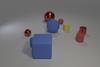
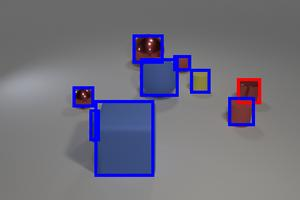

In [8]:
HTML(html_str)